# Data Analysis: Exploring Australia's coral reefs.

## Background:
Dataset[🔗Australian Institute of Marine Biology](https://apps.aims.gov.au/metadata/view/8a698de1-3fbf-48a5-b068-358b07aad35c). 

The available features are:

* 'STATION_ID': ID of the measuring site
* 'MMP_SITE_NAME':  Marine Monitoring Program measuring site name. There is a 1:1 correspondence with STATION_ID.
* 'LONGITUDE': longitude of the measuring site
* 'LATITUDE': latitude of the measuring site
* 'LOGGER_SERIAL': identification number of the logger.
* 'SAMPLE_DAY': date of the sample
* 'CHL_QA_AVG': average daily concentration of chlorophyll per unit volume of the water body, measured in ug/L (micro grams per liter)
* 'NTU_QA_AVG': average turbidity of the water body measured in NTU (Nephelometric Turbidity Unit). Turbidity measures the cloudiness or haziness of a fluid due to suspended particles.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
measurements = pd.read_csv("data/00_data_analysis/combined_marine_dataset_3sites.csv", parse_dates=["SAMPLE_DAY"]) #
measurements.head()

,STATION_ID,MMP_SITE_NAME,LONGITUDE,LATITUDE,LOGGER_SERIAL,SAMPLE_DAY,CHL_QA_AVG,NTU_QA_AVG
0,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-22,1.910,3.901
1,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-23,1.935,3.958
2,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-24,1.867,2.408
3,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-25,2.166,1.352
4,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-26,1.911,1.058


## Analyzing the time series


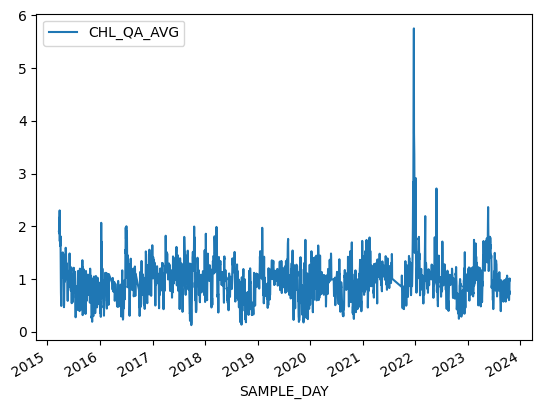

In [4]:
# filter the dataset
bur13_measurements = measurements[measurements["STATION_ID"]=="BUR13"]

# set the index to the "SAMPLE_DAY" column
bur13_measurements.set_index("SAMPLE_DAY", inplace=True)

# create the chlorophyll plot
bur13_chl_ax = bur13_measurements.plot(kind="line", y="CHL_QA_AVG")

<Figure size 640x480 with 0 Axes>

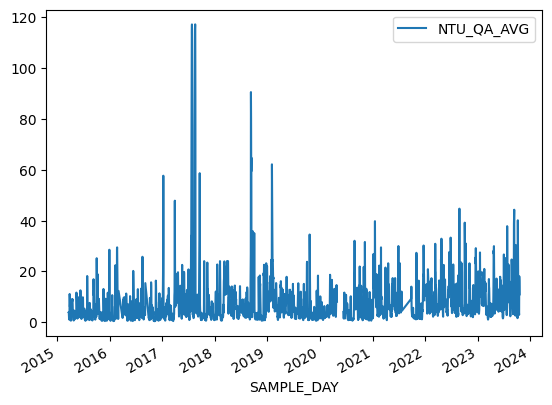

In [5]:


plt.figure()

# Create the plot for the turbidity
bur13_ntu_ax = bur13_measurements.plot(kind="line", y="NTU_QA_AVG")



<Axes: xlabel='SAMPLE_DAY'>

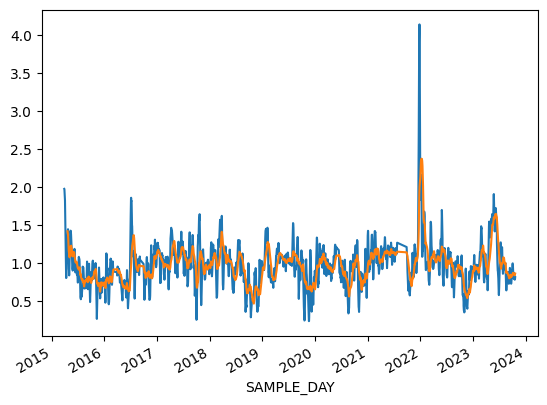

In [6]:
# MOVING AVERAGE

# find the moving average for a window of length 7
bur13_ma7 = bur13_measurements["CHL_QA_AVG"].rolling(window=7).mean()

# plot the moving average for a window of length 7
bur13_ma_ax = bur13_ma7.plot(kind="line")

# find the moving average for a window of length 30
bur13_ma30 = bur13_measurements["CHL_QA_AVG"].rolling(window=30).mean()

# plot the moving average for a window of length 30 (don't need to save it in a variable)
bur13_ma30.plot(kind="line")


In [19]:
# add the column "CHL_PCT_CHANGE" with the percent change. Set fill_method=None
bur13_measurements["CHL_PCT_CHANGE"] = bur13_measurements["NTU_QA_AVG"].pct_change(fill_method=None)

# find the value of the highest percent change
max_pct_change_value = bur13_measurements["CHL_PCT_CHANGE"].abs().max()

# find the index (date) where the maximum (absolute) percent change occurs
max_pct_change_date = bur13_measurements[bur13_measurements["CHL_PCT_CHANGE"] == max_pct_change_value].index



/var/folders/4l/xr8p7w157497lf8n30n3k31w0000gn/T/ipykernel_25514/412065105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bur13_measurements["CHL_PCT_CHANGE"] = bur13_measurements["NTU_QA_AVG"].pct_change(fill_method=None)


In [20]:
# print the results
print("The maximum percent change value happened on",max_pct_change_date[0],
      "with a value of", round(max_pct_change_value,2), "%")

The maximum percent change value happened on 2019-12-18 00:00:00 with a value of 14.31 %


In [23]:
bur13_measurements["CHL_PCT_CHANGE"].abs().sort_values(ascending=False)

SAMPLE_DAY
2019-12-18    14.306373
2021-11-01     9.210300
2023-09-23     8.534315
2022-10-04     7.088508
2021-01-06     7.026193
                ...    
2022-01-06          NaN
2022-01-07          NaN
2022-01-08          NaN
2022-01-09          NaN
2022-01-10          NaN
Name: CHL_PCT_CHANGE, Length: 3026, dtype: float64

## Correlation between the measurements
You want to also learn if there is any correlation between the chl concentration and turbidity. Create a scatter plot of these two variables for the Burdekin River site.

Text(0, 5, '2021')

/Users/gabi/codes/data_science/.venv/lib/python3.12/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


<Figure size 640x480 with 0 Axes>

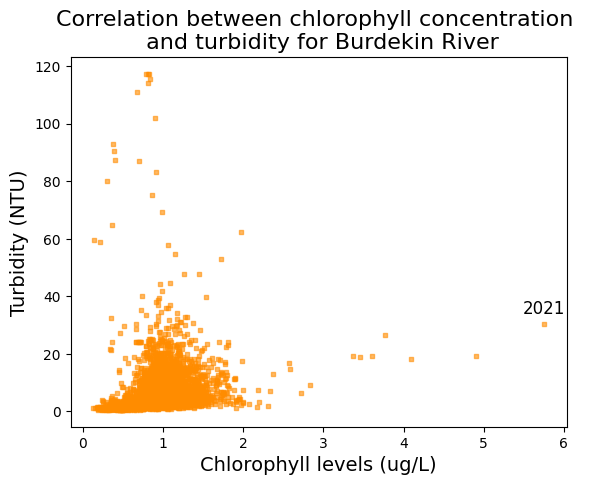

In [10]:
plt.figure()


# create the scatterplot
chl_ntu_scatter = bur13_measurements.plot(kind="scatter", x="CHL_QA_AVG", y="NTU_QA_AVG",
                                          alpha=0.6, marker="s", color="darkorange", s=10)

# set the title
plt.title("Correlation between chlorophyll concentration \n and turbidity for Burdekin River", fontsize=16)
# set the x label
plt.xlabel("Chlorophyll levels (ug/L)", fontsize=14)
# set the y label
plt.ylabel("Turbidity (NTU)", fontsize=14)

# annotation
# find the value of the max chl concentration
max_chl = bur13_measurements["CHL_QA_AVG"].max()
# find the index where the max happened
max_idx = bur13_measurements[bur13_measurements["CHL_QA_AVG"]==max_chl].index
# find the turbidity value for that measurement
ntu_max_chl = bur13_measurements.loc[max_idx]["NTU_QA_AVG"]
# find the year for the measurement.
# max_idx will be in a DatetimeIndex format so you need to access the value by getting the first element ([0])
year_max_chl = max_idx[0].year
# add the annotation
plt.annotate(text=year_max_chl, xy=(max_chl,ntu_max_chl),
             xytext=(0,5), textcoords="offset points",
             ha="center", va="bottom",
             fontsize=12)

In [11]:
print("The correlation between turbidity and chlorophyll for the Burdekin River site is:", round(bur13_measurements["NTU_QA_AVG"].corr(bur13_measurements["CHL_QA_AVG"]),4))

The correlation between turbidity and chlorophyll for the Burdekin River site is: 0.1779


## Chlorophyll concentration over the years 


<Figure size 1000x800 with 0 Axes>

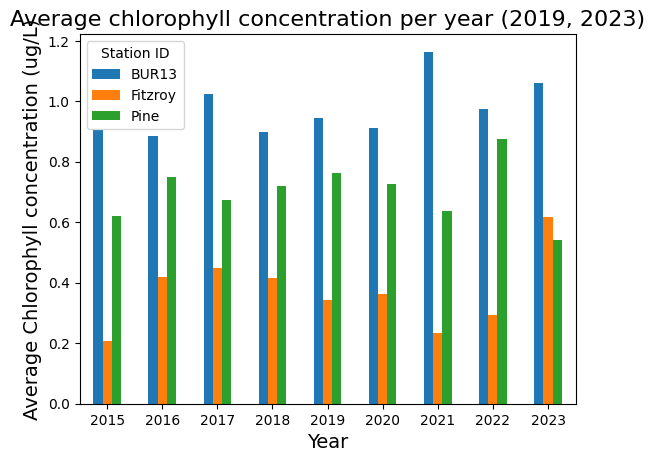

In [12]:


# add the YEAR column, you can use the .dt.year method for this
measurements["YEAR"] = measurements["SAMPLE_DAY"].dt.year
# group the measurements by YEAR and STATION_ID. Take the mean of the CHL feature
grouped_measurements = measurements.groupby(["YEAR", "STATION_ID"])["CHL_QA_AVG"].mean()

### END CODE HERE ###

plt.figure(figsize=(10,8))

### START CODE HERE ###

# create the plot. Don't forget to set the figure size
chl_bar_plot = grouped_measurements.unstack().plot(kind="bar")
# set the x label
plt.xlabel("Year", fontsize=14)
# set the ylabel
plt.ylabel("Average Chlorophyll concentration (ug/L)", fontsize=14)
# change the legend title
plt.legend(title="Station ID")
# set the rotation for the xticks
plt.xticks(rotation=0, fontsize=10)
# set the title
plt.title("Average chlorophyll concentration per year (2019, 2023)", fontsize=16)



plt.show()

Try answering these questions:
* Are there any visible pattern in the data that might suggest a predictable behavior, or it is about the same value across time?
* Which is the site with highest chlorophyll concentration?
* A chlorophyll concentration above 0.7 is considered dangerous for coral reefs. On average, how well (or how bad) are these three sites doing? 

## Visualizing all the sites


<Figure size 1000x800 with 0 Axes>

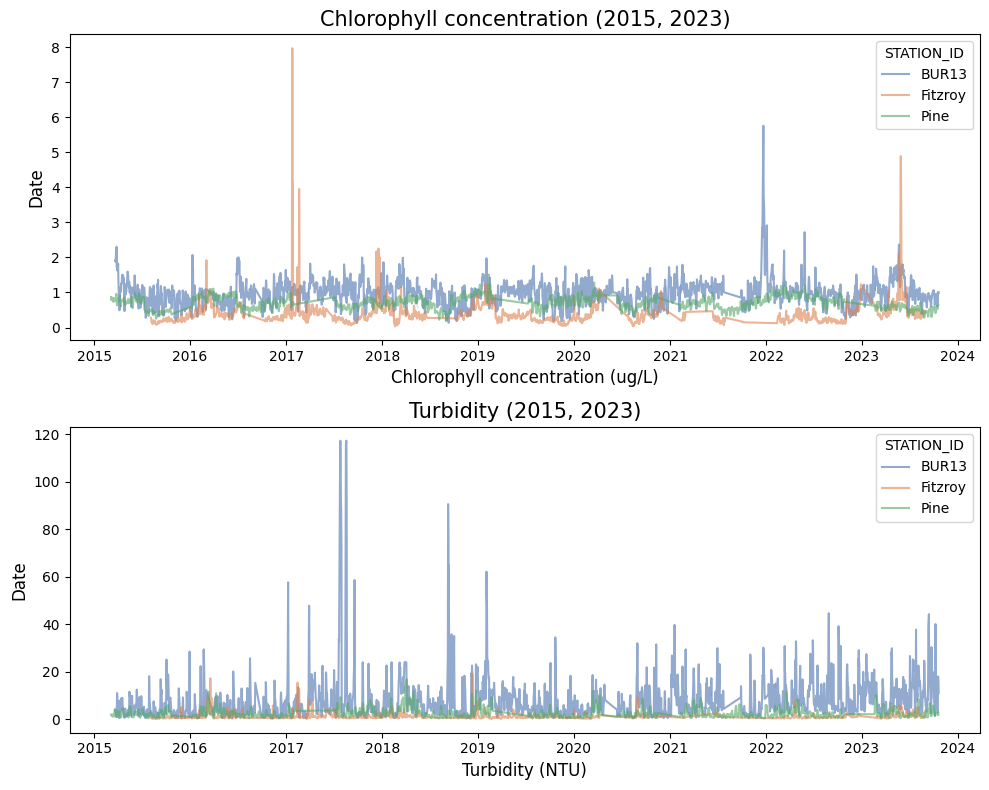

In [13]:


plt.figure(figsize=(10, 8))


# create the subplots. Set the figure size
all_series_fig, all_series_ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# add the lineplot for the first axis
sns.lineplot(data=measurements, x="SAMPLE_DAY", y="CHL_QA_AVG",
             hue="STATION_ID", ax=all_series_ax[0], palette="deep",
             alpha=0.6)
# Set the axis title
all_series_ax[0].set_title("Chlorophyll concentration (2015, 2023)", fontsize=15)
# Set the axis x label
all_series_ax[0].set_xlabel("Chlorophyll concentration (ug/L)", fontsize=12)
# Set the axis y label 
all_series_ax[0].set_ylabel("Date", fontsize=12)


# add the lineplot for the first axis
sns.lineplot(data=measurements, x="SAMPLE_DAY", y="NTU_QA_AVG", hue="STATION_ID", 
             ax=all_series_ax[1], palette="deep",
             alpha=0.6)
# set the axis title
all_series_ax[1].set_title("Turbidity (2015, 2023)", fontsize=15)
# set the axis xlabel
all_series_ax[1].set_xlabel("Turbidity (NTU)", fontsize=12)
# set the axis ylabel
all_series_ax[1].set_ylabel("Date", fontsize=12)

plt.tight_layout()

Try answering the following questions:
* Do chlorophyll lines follow the same behavior between different sites?
* If spikes on the plots happen at the same time, it could be an indication of some phenomenon affecting all the sites at once. Do you think this is the case?
* Are spikes in the turbidness influenced by the ones in chlorophyll levels? Are they aligned between the two plots?
* Compare the information you can visually extract from these plots, and compare with the column chart from the previous exercise. Sometimes simpler plots can be easier to interpret, right?

Text(0.5, 1.0, 'Distribution of the chlorophyll concentration')

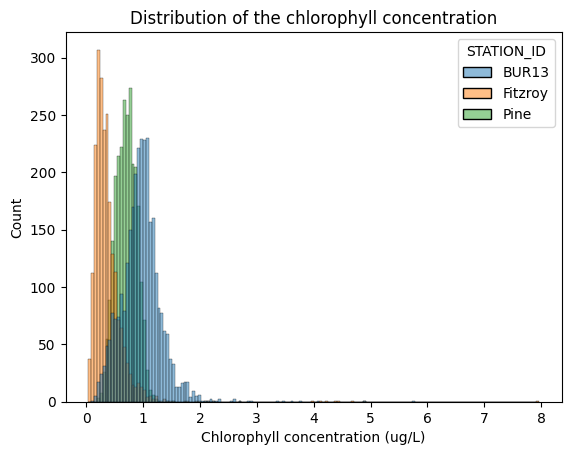

In [14]:


plt.figure()


 
# create the histogram
hist_ax = sns.histplot(measurements, x="CHL_QA_AVG", hue="STATION_ID")
# set the xlabel 
plt.xlabel("Chlorophyll concentration (ug/L)")
# set the title
plt.title("Distribution of the chlorophyll concentration")



Try answering the following questions:
* Do you think the chlorophyll at different sites is distributed the same?
* What can you say about the mode of the distribution for each site?
* Are any of the distributions skewed? If so, which ones? What is the sign of the skew?
* Do all the distributions have a similar spread? 
* Can you say anything about outliers?


Text(0.5, 1.0, 'Box-plot of the chlorophyll concentration')

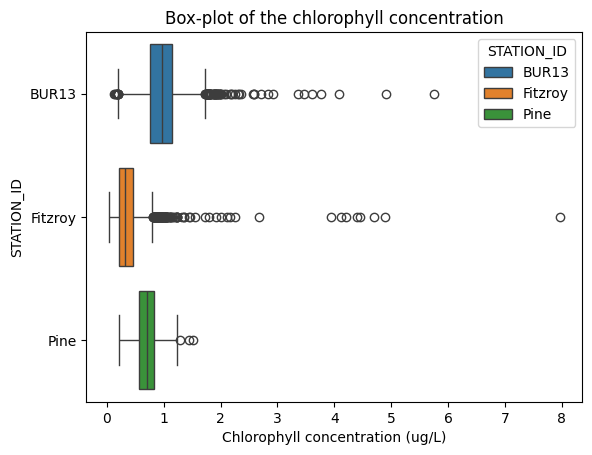

In [15]:

plt.figure()



# create the boxplot
boxplot_ax = sns.boxplot(measurements, x="CHL_QA_AVG", y="STATION_ID", hue="STATION_ID", legend=True)
# set the xlabel
plt.xlabel("Chlorophyll concentration (ug/L)")
# set the title
plt.title("Box-plot of the chlorophyll concentration")